In [ ]:
! pip install mofapy2
! pip install mofax


  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import pandas as pd
import numpy as np
from mofapy2.run.entry_point import entry_point
import seaborn as sns
import mofax

# initialise entry point
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [ ]:
metadata = pd.read_csv('covariates.csv')
metadata.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)
metadata.head()

,sample,dataset,age,gender,stage,pt,pn,pm,tnm,grade,msi,cimp,kras_mut,braf_mut,cms_label,osMo,osStat,rfsMo,rfsStat
0,TCGA.A6.2672,tcga,82,female,3.0,3.0,1,0.0,IIIB,NaN,msi,CIMP.High,0.0,0.0,CMS1,16.536986,0.0,NaN,NaN
1,TCGA.A6.3809,tcga,71,female,2.0,4.0,0,0.0,IIB/IIC,NaN,msi,CIMP.High,NaN,NaN,CMS1,10.290411,0.0,NaN,NaN
2,TCGA.A6.5661,tcga,80,female,2.0,3.0,0,0.0,IIA,NaN,msi,CIMP.High,0.0,1.0,CMS1,10.060274,0.0,NaN,NaN
3,TCGA.A6.5665,tcga,84,female,2.0,3.0,0,0.0,IIA,NaN,msi,CIMP.High,0.0,1.0,CMS1,9.402740,0.0,NaN,NaN
4,TCGA.A6.6653,tcga,82,male,1.0,2.0,0,0.0,I,NaN,msi,CIMP.High,1.0,1.0,CMS1,2.958904,0.0,NaN,NaN


In [ ]:
gex = pd.read_csv('gex.csv')
gex.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)

gex = pd.melt(gex, value_vars = list(gex.columns)[1:], id_vars=['feature'], var_name='sample')
gex['view'] = 'RNA'
gex = pd.merge(gex, metadata[['sample', 'cms_label']])
gex['group'] = gex['cms_label']
gex.drop(['cms_label'], axis=1, inplace=True)
gex.head()


,feature,sample,value,view,group
0,RNF113A,TCGA.A6.2672,21.195670,RNA,CMS1
1,S100A13,TCGA.A6.2672,19.726005,RNA,CMS1
2,AP3D1,TCGA.A6.2672,11.530217,RNA,CMS1
3,ATP6V1G1,TCGA.A6.2672,0.000000,RNA,CMS1
4,UBQLN4,TCGA.A6.2672,15.356366,RNA,CMS1


In [ ]:
muts = pd.read_csv('muts.csv')
muts.rename(columns = {'Unnamed: 0': 'feature'}, inplace=True)
muts = pd.melt(muts, id_vars=['feature'], value_vars=list(muts.columns)[1:], var_name='sample')
muts = pd.merge(muts, metadata[['sample', 'cms_label']])
muts['group'] = muts['cms_label']
muts['view'] = 'Mutation'
muts.drop(['cms_label'], axis=1, inplace=True)
muts.head()

,feature,sample,value,group,view
0,TTN,TCGA.A6.2672,1,CMS1,Mutation
1,TP53,TCGA.A6.2672,0,CMS1,Mutation
2,APC,TCGA.A6.2672,0,CMS1,Mutation
3,KRAS,TCGA.A6.2672,0,CMS1,Mutation
4,SYNE1,TCGA.A6.2672,1,CMS1,Mutation


In [ ]:
cnv = pd.read_csv('cnv.csv')
cnv.rename(columns = {'Unnamed: 0': 'feature'}, inplace=True)
cnv = pd.melt(cnv, id_vars=['feature'], value_vars=list(cnv.columns)[1:], var_name='sample')
cnv = pd.merge(cnv, metadata[['sample', 'cms_label']])

cnv['group'] = cnv['cms_label']
cnv['view'] = 'CNV'
cnv.drop(['cms_label'], axis=1, inplace=True)
cnv

,feature,sample,value,group,view
0,8p23.2,TCGA.A6.2672,0.000000,CMS1,CNV
1,8p23.3,TCGA.A6.2672,0.000000,CMS1,CNV
2,8p23.1,TCGA.A6.2672,0.000000,CMS1,CNV
3,8p21.3,TCGA.A6.2672,0.000000,CMS1,CNV
4,8p12,TCGA.A6.2672,0.000000,CMS1,CNV
...,...,...,...,...,...
12095,7q32.1,TCGA.F5.6814,0.000000,CMS1,CNV
12096,17p11.2,TCGA.F5.6814,0.179605,CMS1,CNV
12097,15q11.1,TCGA.F5.6814,0.000000,CMS1,CNV
12098,15q11.2,TCGA.F5.6814,0.000000,CMS1,CNV


In [ ]:
data_dt = pd.concat([gex, muts, cnv])
data_dt = pd.merge(data_dt, metadata[['sample', 'age']])
data_dt.head()

,feature,sample,value,view,group,age
0,RNF113A,TCGA.A6.2672,21.195670,RNA,CMS1,82
1,S100A13,TCGA.A6.2672,19.726005,RNA,CMS1,82
2,AP3D1,TCGA.A6.2672,11.530217,RNA,CMS1,82
3,ATP6V1G1,TCGA.A6.2672,0.000000,RNA,CMS1,82
4,UBQLN4,TCGA.A6.2672,15.356366,RNA,CMS1,82


In [ ]:
ent.set_data_options(
    scale_groups = True,
    scale_views = True
)

Scaling views to unit variance...

Scaling groups to unit variance...



In [ ]:
ent.set_data_df(data_dt, likelihoods = ['gaussian', 'bernoulli', 'gaussian'])



Loaded group='CMS1' view='CNV' with N=61 samples and D=100 features...
Loaded group='CMS1' view='Mutation' with N=61 samples and D=200 features...
Loaded group='CMS1' view='RNA' with N=61 samples and D=500 features...
Loaded group='CMS3' view='CNV' with N=60 samples and D=100 features...
Loaded group='CMS3' view='Mutation' with N=60 samples and D=200 features...
Loaded group='CMS3' view='RNA' with N=60 samples and D=500 features...




In [ ]:
ent.set_model_options(
    factors = 7, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (CNV): gaussian
- View 1 (Mutation): bernoulli
- View 2 (RNA): gaussian




In [ ]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

In [ ]:
ent.build()

ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -477704.54 

Iteration 1: time=0.08, ELBO=-119073.32, deltaELBO=358631.220 (75.07385604%), Factors=6
Iteration 2: time=0.04, ELBO=-106691.09, deltaELBO=12382.236 (2.59202812%), Factors=6
Iteration 3: time=0.04, ELBO=-103101.33, deltaELBO=3589.756 (0.75145949%), Factors=6
Iteration 4: time=0.04, ELBO=-101653.75, deltaELBO=1447.583 (0.30302887%), Factors=6
Iteration 5: time=0.04, ELBO=-100850.88, deltaELBO=802.868 (0.16806784%), Factors=6
Iteration 6: time=0.04, ELBO=-100128.51, deltaELBO=722.369 (0.15121676%), Factors=6
Iteration 7: time=0.04, ELBO=-99433.67, deltaELBO=694.844 (0.14545466%), Factors=6
Iteration 8: time=0.04, ELBO=-98818.32, deltaELBO=615.347 (0.12881335%), Factors=6
Iteration 9: time=0.04, ELBO=-98335.57, deltaELBO=482.753 (0.10105676%), Factors=6
Iteration 10: time=0.04, ELBO=-98017.81, deltaELBO=317.754 (0.06651679%), Factors=6
I

In [ ]:
ent.save(outfile='cancer_with_subtypes.hdf5', save_data=True)

Saving model in cancer_with_subtypes.hdf5...


In [ ]:
help(ent)

In [ ]:
factors = ent.model.nodes['Z'].getExpectation()

In [ ]:
weights = ent.model.nodes['W'].getExpectation()

In [ ]:
r2 = ent.model.calculate_variance_explained()

In [ ]:
import h5py

In [ ]:
f = h5py.File('cancer.hdf5', 'r')

In [ ]:
f.keys()

<KeysViewHDF5 ['data', 'expectations', 'features', 'groups', 'intercepts', 'model_options', 'samples', 'training_opts', 'training_stats', 'variance_explained', 'views']>

In [ ]:
# Extract factors (per group)
f["expectations"]["Z"]["group1"][()]

<HDF5 group "/variance_explained/r2_total" (1 members)>

In [ ]:
# Extract weights (per view)
f["expectations"]["W"]["RNA"][()]

array([[ 1.30361523e-02,  1.01318054e-02,  2.48531058e-02, ...,
        -5.16145014e-03,  1.18928630e-03,  3.41193951e-03],
       [ 5.40550405e-02,  4.17656121e-03,  2.64246639e-01, ...,
         6.33586202e-02,  1.59642201e-01,  1.57021566e-02],
       [ 2.55856171e-03,  1.13689985e-02,  7.36749305e-03, ...,
         2.87958010e-04, -6.62183394e-02,  3.69617882e-03],
       [ 3.36336001e-02,  6.75882993e-02, -7.06298490e-03, ...,
        -1.20695457e-02, -2.39444409e-04, -6.62035677e-02],
       [ 7.13809495e-02,  1.17514185e-01, -8.83458228e-02, ...,
        -3.42896246e-03,  1.48018453e-02, -1.98903181e-02],
       [-5.17655857e-02, -1.29008587e-02, -3.00174690e-02, ...,
         2.12301003e-02,  3.98270819e-01,  2.11998472e-01]])

In [ ]:
f["expectations"]["W"]["Mutation"][()]

array([[-0.03433392,  0.04526865, -0.00326518, ..., -0.00835027,
         0.004311  , -0.0136087 ],
       [ 0.36069478, -0.0030371 , -0.14107088, ...,  0.13316431,
         0.28371932,  0.22723078],
       [-0.00206141,  0.01494231,  0.00129819, ..., -0.00579994,
         0.00336222, -0.00090627],
       [-0.00353553,  0.00347362, -0.0011761 , ..., -0.01080029,
         0.00208449, -0.02257834],
       [ 0.00352772,  0.00740094, -0.00491644, ..., -0.00651785,
         0.01122368, -0.00362426],
       [-0.15664168, -0.0374791 , -0.29943467, ..., -0.2990253 ,
        -0.1335609 , -0.21314015]])

In [ ]:
f["expectations"]["W"]["CNV"][()]


array([[ 3.32699956e-01,  3.73895141e-01,  3.48238919e-01,
         3.67839580e-01,  3.51329453e-01,  3.51367251e-01,
         3.66274430e-01,  3.84350822e-01,  1.91974206e-01,
         2.18501882e-01,  2.03264482e-01,  2.03633289e-01,
         2.11350407e-01,  2.08786442e-01,  1.65449011e-01,
         4.20867854e-01,  4.43129666e-01,  4.37790603e-01,
         1.98643252e-01,  4.00774306e-01,  4.00774306e-01,
         4.12451711e-01,  4.21980201e-01,  4.21980201e-01,
         4.32897420e-01,  4.26627436e-01,  4.15261366e-01,
         4.45927079e-01,  4.45927079e-01,  4.17537754e-01,
         4.05114711e-01,  1.77713076e-01,  4.56411842e-01,
         4.35755289e-01,  2.02482091e-01,  4.32936563e-01,
         4.42089217e-01,  4.45103520e-01,  4.66062500e-01,
         1.64834544e-01,  4.42089217e-01,  4.12720936e-01,
         4.41327029e-01,  1.66142141e-01,  4.48717030e-01,
         4.32936563e-01,  4.41095491e-01,  1.77713076e-01,
         4.66723453e-01,  4.42089217e-01,  4.35755289e-0

In [ ]:
# Extract variance explained estimates
f["variance_explained"]["r2_per_factor"]['group1'][()]

array([[3.28942241e+01, 5.39197787e+00, 7.37716510e-01, 1.18829004e+01,
        9.43655060e+00, 2.47607876e-02],
       [3.08403221e-01, 1.52131716e+01, 2.81963822e-01, 2.86752195e-01,
        1.53598626e-01, 4.47453886e+00],
       [5.26859496e-01, 6.09383104e+00, 1.67750401e+01, 1.83347145e+00,
        3.78974358e+00, 7.54238755e-01]])

In [ ]:
f["variance_explained"]["r2_total"]['group1'][()]

array([60.60759778, 19.8547849 , 30.03008188])

## Run MEFISTO

In [ ]:
! pip install dtw-python

     |████████████████████████████████| 580 kB 4.3 MB/s 


In [ ]:
cancer_groups = [data_dt.loc[data_dt.group == group,["sample", "group", "age"]].drop_duplicates().set_index("sample") 
for group in ent.data_opts["groups_names"]]
ent.data_opts['samples_metadata'] = cancer_groups

ent.set_covariates('age', covariates_names='age')


Loaded 1 covariate(s) for each sample...




In [ ]:
ent.set_model_options(factors=5)
ent.set_train_options(seed=2020)
ent.set_smooth_options(n_grid=10, start_opt=50, opt_freq=50)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (CNV): gaussian
- View 1 (Mutation): bernoulli
- View 2 (RNA): gaussian




In [ ]:
ent.build()
ent.run()
## To get interpolated factor values
ent.predict_factor(data_dt.age.unique().reshape(-1, 1))
ent.save(f"cancer_mefisto.hdf5")



######################################
## Training the model with seed 2020 ##
######################################


ELBO before training: -387328.70 

Iteration 1: time=0.05, ELBO=-117845.21, deltaELBO=269483.489 (69.57488221%), Factors=5
Iteration 2: time=0.04, ELBO=-106560.76, deltaELBO=11284.457 (2.91340577%), Factors=5
Iteration 3: time=0.04, ELBO=-103247.18, deltaELBO=3313.578 (0.85549504%), Factors=5
Iteration 4: time=0.04, ELBO=-102049.76, deltaELBO=1197.424 (0.30914930%), Factors=5
Iteration 5: time=0.03, ELBO=-101364.24, deltaELBO=685.519 (0.17698646%), Factors=5
Iteration 6: time=0.03, ELBO=-100713.09, deltaELBO=651.143 (0.16811133%), Factors=5
Iteration 7: time=0.04, ELBO=-100080.40, deltaELBO=632.694 (0.16334810%), Factors=5
Iteration 8: time=0.03, ELBO=-99523.39, deltaELBO=557.012 (0.14380859%), Factors=5
Iteration 9: time=0.04, ELBO=-99090.99, deltaELBO=432.400 (0.11163652%), Factors=5
Iteration 10: time=0.03, ELBO=-98812.03, deltaELBO=278.953 (0.07201966%), Factors

SystemExit: ignored

# Translational Regulation

In [ ]:
data = pd.read_csv('combined.txt', sep='\t')
data.head()

,feature,time,value,sample,group,view
0,NM_001001144_Bulk,0,1729.0,RNA_Bulk_0,RNA,Bulk
1,NM_001001144_Bulk,1,2234.0,RNA_Bulk_1,RNA,Bulk
2,NM_001001144_Bulk,2,1699.5,RNA_Bulk_2,RNA,Bulk
3,NM_001001144_Bulk,3,1205.0,RNA_Bulk_3,RNA,Bulk
4,NM_001001144_Bulk,4,1226.0,RNA_Bulk_4,RNA,Bulk


In [ ]:
ent = entry_point()
ent.set_data_options()
ent.set_data_df(data)



        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


Loaded group='RNA' view='Bulk' with N=7 samples and D=8453 features...
Loaded group='RNA' view='Crude' with N=7 samples and D=8453 features...
Loaded group='RNA' view='Cyto' with N=7 samples and D=8453 features...
Loaded group='RPF' view='Bulk' with N=7 samples and D=8453 features...
Loaded group='RPF' view='Crude' with N=7 samples and D=8453 features...
Loaded group='RPF' vie

In [ ]:
ent.set_model_options(factors=5)
ent.set_train_options()


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (Bulk): gaussian
- View 1 (Crude): gaussian
- View 2 (Cyto): gaussian




In [ ]:
times = [data[['sample', 'time', 'group']].drop_duplicates().set_index('sample').loc[np.concatenate(ent.data_opts['samples_names'])].query('group == @g').time.values.reshape(-1, 1) 
for g in ent.data_opts['groups_names']]
idx = np.where(ent.data_opts['groups_names'] == 'RNA')

In [ ]:
times

In [ ]:
idx = ent.data_opts['groups_names'].index("RNA")


In [ ]:
ent.set_covariates(times, covariates_names="time")
ent.set_smooth_options(warping=True, warping_ref = idx, model_groups = True)

Loaded 1 covariate(s) for each sample...


##
## Warping set to True: aligning the covariates across groups
##


In [ ]:
ent.build()
ent.run()
## To interpolate factor values
ent.predict_factor(new_covariates=np.arange(1, 15).reshape(-1, 1))
ent.save("bf_diff.hdf5")



######################################
## Training the model with seed 397974 ##
######################################


ELBO before training: -949899426780.75 

Iteration 1: time=0.24, ELBO=-2811562.53, deltaELBO=949896615218.217 (99.99970401%), Factors=5
Iteration 2: time=0.22, ELBO=-2465198.18, deltaELBO=346364.347 (0.00003646%), Factors=5
Iteration 3: time=0.23, ELBO=-2446505.51, deltaELBO=18692.677 (0.00000197%), Factors=5
Iteration 4: time=0.22, ELBO=-2436473.85, deltaELBO=10031.652 (0.00000106%), Factors=5
Iteration 5: time=0.25, ELBO=-2429374.61, deltaELBO=7099.248 (0.00000075%), Factors=5
Iteration 6: time=0.23, ELBO=-2423654.67, deltaELBO=5719.937 (0.00000060%), Factors=5
Iteration 7: time=0.22, ELBO=-2418675.46, deltaELBO=4979.205 (0.00000052%), Factors=5
Iteration 8: time=0.22, ELBO=-2414306.17, deltaELBO=4369.294 (0.00000046%), Factors=5
Iteration 9: time=0.22, ELBO=-2410467.40, deltaELBO=3838.771 (0.00000040%), Factors=5
Iteration 10: time=0.24, ELBO=-2407018.85, delta

SystemExit: ignored

In [ ]:
%tb

SystemExit: ignored

In [ ]:
! pip install muon


In [ ]:
import scanpy as sc

import muon as mu

In [ ]:
data.head()

,feature,time,value,sample,group,view
0,NM_001001144_Bulk,0,1729.0,RNA_Bulk_0,RNA,Bulk
1,NM_001001144_Bulk,1,2234.0,RNA_Bulk_1,RNA,Bulk
2,NM_001001144_Bulk,2,1699.5,RNA_Bulk_2,RNA,Bulk
3,NM_001001144_Bulk,3,1205.0,RNA_Bulk_3,RNA,Bulk
4,NM_001001144_Bulk,4,1226.0,RNA_Bulk_4,RNA,Bulk


In [ ]:
bulk = data[data.view == 'Bulk'].pivot(index='sample', columns = 'feature', values='value')
bulk.head()

feature,NM_001001144_Bulk,NM_001001181_Bulk,NM_001001182_Bulk,NM_001001185_Bulk,NM_001001295_Bulk,NM_001001326_Bulk,NM_001001491_Bulk,NM_001001493_Bulk,NM_001001565_Bulk,NM_001001806_Bulk,NM_001001881_Bulk,NM_001001882_Bulk,NM_001001892_Bulk,NM_001001932_Bulk,NM_001001983_Bulk,NM_001001984_Bulk,NM_001002004_Bulk,NM_001002008_Bulk,NM_001002011_Bulk,NM_001002764_Bulk,NM_001002929_Bulk,NM_001003908_Bulk,NM_001003912_Bulk,NM_001003918_Bulk,NM_001003934_Bulk,NM_001003949_Bulk,NM_001003950_Bulk,NM_001003953_Bulk,NM_001003955_Bulk,NM_001003961_Bulk,NM_001004062_Bulk,NM_001004066_Bulk,NM_001004140_Bulk,NM_001004143_Bulk,NM_001004144_Bulk,NM_001004164_Bulk,NM_001004185_Bulk,NM_001004191_Bulk,NM_001004361_Bulk,NM_001004362_Bulk,...,NM_207110_Bulk,NM_207161_Bulk,NM_207204_Bulk,NM_207207_Bulk,NM_207209_Bulk,NM_207213_Bulk,NM_207214_Bulk,NM_207215_Bulk,NM_207220_Bulk,NM_207225_Bulk,NM_207234_Bulk,NM_207237_Bulk,NM_207239_Bulk,NM_207255_Bulk,NM_207298_Bulk,NM_207301_Bulk,NM_207302_Bulk,NM_207525_Bulk,NM_207530_Bulk,NM_207541_Bulk,NM_207625_Bulk,NM_207633_Bulk,NM_207636_Bulk,NM_207653_Bulk,NM_207654_Bulk,NM_207655_Bulk,NM_207659_Bulk,NM_207671_Bulk,NM_207677_Bulk,NM_207678_Bulk,NM_211358_Bulk,NM_212433_Bulk,NM_212445_Bulk,NM_212446_Bulk,NM_212450_Bulk,NM_212473_Bulk,NM_212484_Bulk,NM_213614_Bulk,NM_213659_Bulk,NM_213733_Bulk
sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RNA_Bulk_0,1729.0,62.5,70.5,56.5,258.0,617.0,460.5,48.5,930.5,974.0,46.5,725.0,320.0,68.0,1166.0,598.5,2372.5,22.0,14923.0,388.0,943.5,1367.0,823.5,292.0,299.5,1568.5,180.5,413.5,505.0,28.5,189.0,16.5,192.0,685.0,705.5,191.0,78.5,102.0,78.0,57.5,...,297.5,152.0,223.0,269.0,424.5,182.0,51.0,265.0,172.5,226.5,119.5,275.5,1956.5,226.0,91.5,87.5,95.5,145.5,217.5,7.0,97.5,58.0,257.5,52.0,15.0,429.5,99.0,76.5,39.5,348.5,65.5,148.0,131.0,172.5,23.5,53.5,150.5,1078.0,812.5,136.0
RNA_Bulk_1,2234.0,63.0,60.5,38.5,229.5,330.5,167.0,67.0,856.0,499.0,39.5,886.0,620.0,96.0,1202.0,701.0,4734.0,16.5,7255.5,237.5,1092.5,1773.0,731.0,532.0,676.5,2045.5,256.5,549.5,226.5,62.5,183.0,20.5,137.0,519.0,685.0,976.5,204.0,81.5,47.0,19.5,...,303.0,204.5,73.5,450.0,603.0,197.0,60.5,317.5,138.5,270.0,162.5,87.5,3394.0,148.0,53.0,172.5,97.5,146.5,261.0,9.0,97.0,54.5,175.0,38.5,25.0,369.5,70.0,98.5,85.5,384.0,148.5,146.5,140.0,186.5,21.5,149.5,206.0,197.5,983.0,311.0
RNA_Bulk_2,1699.5,133.0,49.0,37.0,295.0,158.5,127.5,62.0,321.5,129.0,64.0,1087.0,800.0,79.0,1133.0,627.5,6131.0,14.0,4505.5,247.0,913.0,2019.5,702.5,435.0,896.0,2389.5,574.0,398.0,258.5,38.0,63.5,23.5,67.5,426.5,542.5,714.0,335.5,253.5,37.0,29.0,...,264.0,60.0,49.0,601.5,465.5,212.5,81.5,287.0,226.5,247.5,177.5,67.0,2966.0,107.0,27.0,140.0,147.0,182.5,268.0,7.5,120.0,105.5,197.5,122.5,17.0,84.5,79.0,107.5,150.0,516.0,52.0,252.0,87.0,201.5,31.0,250.5,169.0,160.5,987.0,414.0
RNA_Bulk_3,1205.0,72.5,60.0,18.5,300.0,169.5,206.0,37.5,256.5,180.5,42.0,783.5,1276.5,93.5,877.5,657.0,5267.0,15.0,5251.0,236.5,814.0,1899.0,683.0,398.0,755.0,1779.0,386.0,342.5,207.0,28.0,44.0,25.0,86.0,366.0,479.5,696.0,325.5,244.0,26.5,35.0,...,220.0,69.0,50.5,470.5,356.5,270.0,71.0,330.5,203.5,272.5,92.0,87.0,2003.0,108.5,33.5,80.5,125.5,200.0,305.5,8.0,142.5,68.0,201.0,151.0,19.0,55.5,66.0,111.0,134.5,435.5,46.0,203.5,76.0,156.5,36.0,246.0,180.5,208.5,1009.5,398.0
RNA_Bulk_4,1226.0,77.0,139.5,15.5,481.0,159.0,180.0,27.0,275.5,298.5,24.0,805.5,1307.5,251.0,1209.0,1009.5,5929.5,37.5,3398.5,344.0,779.5,3139.5,852.5,698.5,919.0,2109.5,401.0,355.5,186.5,24.5,46.0,56.5,147.5,389.0,764.0,739.0,409.5,194.5,27.5,65.0,...,301.0,53.0,56.0,365.0,581.5,383.5,133.5,670.0,138.0,298.0,107.0,107.0,1802.5,144.5,23.5,71.0,181.0,197.0,377.5,16.5,329.0,110.0,374.0,207.0,39.5,81.5,189.5,263.0,140.0,570.5,67.0,352.0,93.5,137.0,86.0,236.0,193.0,117.5,1173.0,304.5


In [ ]:
views = data.view.unique()
data_list = [data[data.view == m].pivot(index='sample', columns='feature', values='value') for m in views]
mods = {views[m]:sc.AnnData(data_list[m]) for m in range(len(views))}
mods

{'Bulk': AnnData object with n_obs × n_vars = 14 × 8453,
 'Crude': AnnData object with n_obs × n_vars = 14 × 8453,
 'Cyto': AnnData object with n_obs × n_vars = 14 × 8453}

In [ ]:
obs = (
    data[['sample', 'time', 'group']]
        .drop_duplicates()
        .rename(columns = {'group' : 'type'})
        .set_index('sample')
)
obs

,time,type
sample,,
RNA_Bulk_0,0,RNA
RNA_Bulk_1,1,RNA
RNA_Bulk_2,2,RNA
RNA_Bulk_3,3,RNA
RNA_Bulk_4,4,RNA
RNA_Bulk_5,5,RNA
RNA_Bulk_6,6,RNA
RNA_Cyto_0,0,RNA
RNA_Cyto_1,1,RNA


In [ ]:
mdata = mu.MuData(mods)
mdata.obs = obs
mdata.obs

,time,type
sample,,
RNA_Bulk_0,0,RNA
RNA_Bulk_1,1,RNA
RNA_Bulk_2,2,RNA
RNA_Bulk_3,3,RNA
RNA_Bulk_4,4,RNA
RNA_Bulk_5,5,RNA
RNA_Bulk_6,6,RNA
RNA_Cyto_0,0,RNA
RNA_Cyto_1,1,RNA


In [ ]:
print(mdata)
mdata['Bulk']

MuData object with n_obs × n_vars = 42 × 25359
  obs:	'time', 'type'
  3 modalities
    Bulk:	14 x 8453
    Cyto:	14 x 8453
    Crude:	14 x 8453


AnnData object with n_obs × n_vars = 14 × 8453

In [ ]:
mu.tl.mofa(mdata, use_obs='union',
           n_factors=4,
           groups_label="type",
           smooth_covariate='time', smooth_warping=False,
           smooth_kwargs={"warping_ref": "RNA", "new_values": list(range(1, 7))},
           outfile="models/bf_diff.hdf5",
           n_iterations=15)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Bulk' group='RNA' with N=21 samples and D=8453 features...
Loaded view='Bulk' group='RPF' with N=21 samples and D=8453 features...
Loaded view='Cyto' group='RNA' with N=21 samples and D=8453 features...
Loaded view='Cyto' group='RPF' with N=21 samples and D=8453 features...
Loaded view='Crude' group='RNA' with N=21 samples and D=8453 features...
Loaded view='Crude' 

In [ ]:
import seaborn as sns
palette = sns.color_palette("Set2")

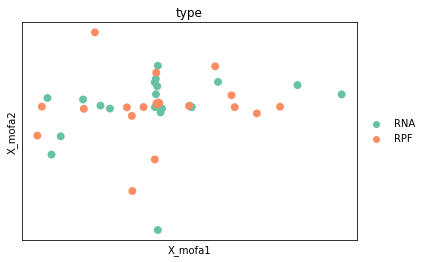

In [ ]:
mu.pl.mofa(mdata, color="type", palette=palette, size = 250)

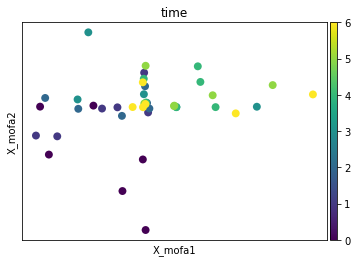

In [ ]:
mu.pl.mofa(mdata, color='time', size=250)

In [ ]:
mdata.obs['Factor1'] = mdata.obsm['X_mofa'][:, 0]

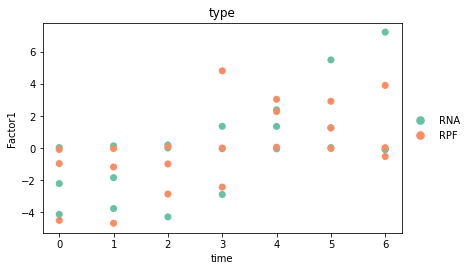

In [ ]:
sc.pl.scatter(mdata, x='time', y='Factor1', color='type',
              palette = palette, size=200)

In [ ]:
import mofax
model = mofax.mofa_model("models/bf_diff.hdf5")
model

MOFA+ model: bf diff
Samples (cells): 42
Features: 25359
Groups: RNA (21), RPF (21)
Views: Bulk (8453), Crude (8453), Cyto (8453)
Factors: 4
Expectations: Sigma, W, Z

MEFISTO:
Covariates available: time
Interpolated factors for 6 new values

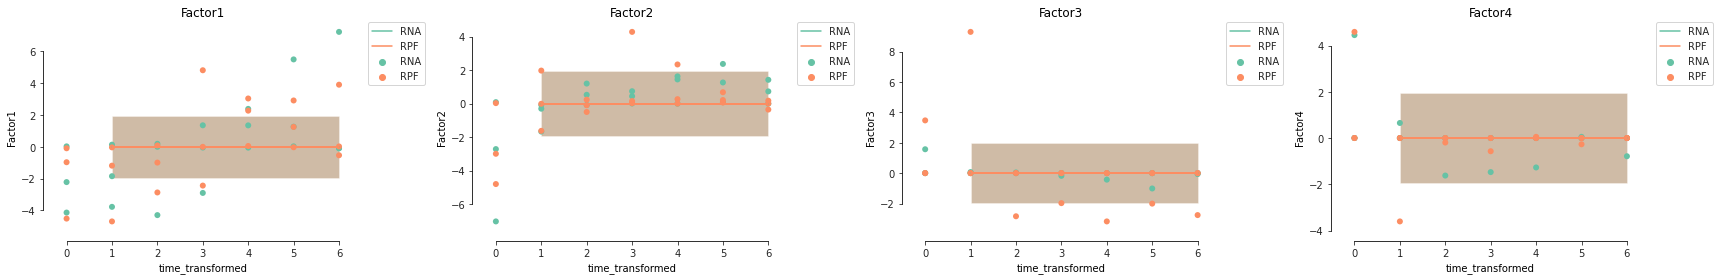

In [ ]:
mofax.plot_interpolated_factors(model, factors=range(model.nfactors),
                        ncols=4, size=70)

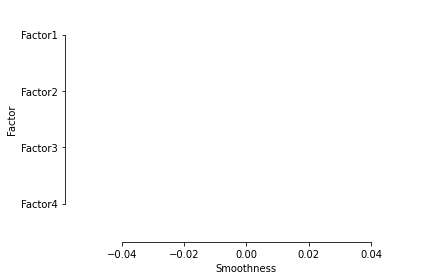

In [ ]:
mofax.plot_smoothness(model)

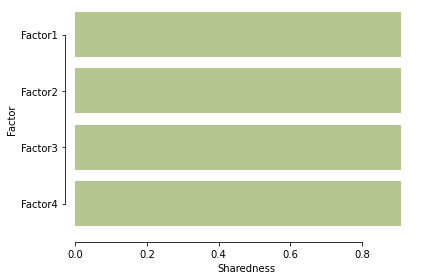

In [ ]:
mofax.plot_sharedness(model)

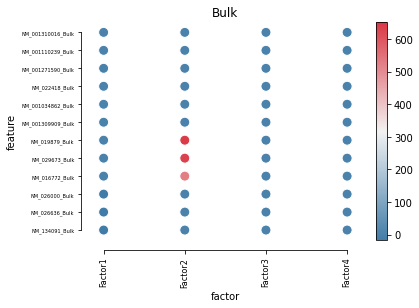

In [ ]:
mofax.plot_weights_dotplot(model, view='Bulk', n_features=3,
                           size=100)